# CNN for one subject

In [120]:
%matplotlib inline
import glob
import os

CORPORA_PATH = "~/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/"

file_path = os.path.expanduser(CORPORA_PATH)
files = glob.glob(os.path.join(file_path, "*.set"))


filename = files[109]

In [121]:
import mne
data_mne = mne.io.read_raw_eeglab(
    filename, preload=True, event_id={"0": 1, "1": 2})

Reading /home/marat/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_11551001.fdt
Reading 0 ... 63231  =      0.000 ...   493.992 secs...


In [122]:
events = mne.find_events(data_mne)

1800 events found
Events id: [1 2]


In [123]:
epochs = mne.Epochs(
        data_mne, events,
        baseline=(None, 0), tmin=-0.1, tmax=0.7)

epochs.load_data()

1800 matching events found
0 projection items activated
Loading data for 1800 events and 104 original time points ...
0 bad epochs dropped


<Epochs  |  n_events : 1800 (all good), tmin : -0.1015625 (s), tmax : 0.703125 (s), baseline : (None, 0), ~21.5 MB, data loaded,
 '1': 1500, '2': 300>

Targets appear as 2 in the third column


We remove last channel as well

In [244]:
import sklearn.utils

X = epochs.get_data()[:, :-1]
y = (events[:, 2] == 2).astype('float')


We need to balance date, first of all

In [245]:

X = np.vstack((X[y==0][:300], X[y==1]))
y = np.array([0] * 300 + [1] * 300)

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1)

In [257]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool2D, Flatten, Dense, Dropout


model = Sequential()

input_shape = X.shape[1:]

n_kernels = 100

model.add(Conv1D(n_kernels, 10, 
                activation='sigmoid', input_shape=(14, 104)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', # using the cross-entropy loss function
              optimizer='rmsprop', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

In [258]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
540/540 [==============================] - 1s 2ms/step - loss: 7.2411 - acc: 0.4981
Epoch 2/10
540/540 [==============================] - 0s 427us/step - loss: 7.9695 - acc: 0.5056
Epoch 3/10
540/540 [==============================] - 0s 385us/step - loss: 7.9695 - acc: 0.5056
Epoch 4/10
540/540 [==============================] - 0s 395us/step - loss: 7.9695 - acc: 0.5056
Epoch 5/10
540/540 [==============================] - 0s 379us/step - loss: 7.9695 - acc: 0.5056
Epoch 6/10
540/540 [==============================] - 0s 389us/step - loss: 7.9695 - acc: 0.5056
Epoch 7/10
540/540 [==============================] - 0s 410us/step - loss: 7.9695 - acc: 0.5056 0s - loss: 7.9016 - acc: 0.509
Epoch 8/10
540/540 [==============================] - 0s 415us/step - loss: 7.9695 - acc: 0.5056
Epoch 9/10
540/540 [==============================] - 0s 407us/step - loss: 7.9695 - acc: 0.5056
Epoch 10/10
540/540 [==============================] - 0s 413us/step - loss: 7.9695 - acc: 0.5056


In [259]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [260]:
model.evaluate(X_test, y_test, verbose=1)

60/60 [==============================] - 0s 7ms/step


[8.8649528503417976, 0.45000000397364298]

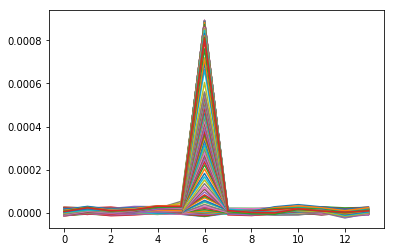

In [277]:
from matplotlib import pyplot as plt

plt.plot(X_test[y_test==0][12]);

In [261]:
model.predict(X_test)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)